# Summary

In this notebook we worked on the training dataset.

- Cleaned the all null values
- Encoded ordinal and nominal categorical features automatically. Also, we did some custom encoding
- Added a data dictionary with attribute categories (nominal, ordinal etc)

Now, the data is ready for feature selection/engineering

In [1]:
%reload_kedro
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

                    INFO     Resolved project path as:                                              ]8;id=429611;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=535818;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/gunee/Projects/Gunee/kaggle-housing-price-prediction.                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/21/23 21:45:49] WARNING  /home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site- ]8;id=440942;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=541816;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py#109\109]8;;\
                             packages/lazy_loader/__init__.py:78: KedroDeprecationWarning:                         
                             'CSVDataSet' has been renamed to 'CSVDataset', and the alias will be                  
                             removed in Kedro-Datasets 2.0.0                                                       
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    WARNING  /home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site- ]8;id=160280;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=981505;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py#109\109]8;;\
                             packages/lazy_loader/__init__.py:78: KedroDeprecationWarning:                         
                             'JSONDataSet' has been renamed to 'JSONDataset', and the alias will be                
                             removed in Kedro-Datasets 2.0.0                                                       
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project Kaggle Housing Price Prediction                          ]8;id=384860;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=798716;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=7227;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=267518;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=418798;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=629668;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [2]:
df = catalog.load("raw_train")
data_dict = catalog.load("data_dictionary")

                    INFO     Loading data from 'raw_train' (CSVDataset)...                      ]8;id=147821;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=346447;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'data_dictionary' (JSONDataset)...               ]8;id=591742;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=425165;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py#492\492]8;;\

# Attributes and their meanings

**Dwelling and Structure Information**:
- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to the property.
- LotArea: Lot size in square feet.
- Street: Type of road access to the property.
- Alley: Type of alley access to the property.
- LotShape: General shape of the property.
- LandContour: Flatness of the property.
- Utilities: Type of utilities available.
- LotConfig: Lot configuration.
- LandSlope: Slope of the property.
- Neighborhood: Physical locations within Ames city limits.
- Condition1: Proximity to various conditions.
- Condition2: Proximity to various conditions (if more than one is present).
- BldgType: Type of dwelling.
- HouseStyle: Style of dwelling.
- OverallQual: Rates the overall material and finish of the house.
- OverallCond: Rates the overall condition of the house.
- YearBuilt: Original construction date.
- YearRemodAdd: Remodel date.
- RoofStyle: Type of roof.
- RoofMatl: Roof material.
- Exterior1st: Exterior covering on the house.
- Exterior2nd: Exterior covering on the house (if more than one material).
- MasVnrType: Masonry veneer type.
- MasVnrArea: Masonry veneer area.
- ExterQual: Exterior material quality.
- ExterCond: Exterior material condition.
- Foundation: Type of foundation.
- BsmtQual: Basement height quality.
- BsmtCond: Basement general condition.
- BsmtExposure: Basement wall exposure.
- BsmtFinType1: Rating of basement finished area.
- BsmtFinSF1: Type 1 finished square feet.
- BsmtFinType2: Rating of basement finished area (if multiple types).
- BsmtFinSF2: Type 2 finished square feet.
- BsmtUnfSF: Unfinished square feet of basement area.
- TotalBsmtSF: Total square feet of the basement area.
- Heating: Type of heating.
- HeatingQC: Heating quality and condition.
- CentralAir: Central air conditioning.
- Electrical: Electrical system.
- 1stFlrSF: First Floor square feet.
- 2ndFlrSF: Second-floor square feet.
- LowQualFinSF: Low-quality finished square feet.
- GrLivArea: Above-grade living area square feet.
- BsmtFullBath: Basement full bathrooms.
- BsmtHalfBath: Basement half bathrooms.
- FullBath: Full bathrooms above grade.
- HalfBath: Half baths above grade.
- BedroomAbvGr: Bedrooms above grade.
- KitchenAbvGr: Kitchens above grade.
- KitchenQual: Kitchen quality.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- Functional: Home functionality.
- Fireplaces: Number of fireplaces.
- FireplaceQu: Fireplace quality.

**Exterior Features and Outdoor Space**:
- WoodDeckSF: Wood deck area in square feet.
- OpenPorchSF: Open porch area in square feet.
- EnclosedPorch: Enclosed porch area in square feet.
- 3SsnPorch: Three-season porch area in square feet.
- ScreenPorch: Screen porch area in square feet.
- PoolArea: Pool area in square feet.
- PoolQC: Pool quality.
- Fence: Fence quality.
- MiscFeature: Miscellaneous features not covered in other categories.
- MiscVal: Value of miscellaneous features.

**Garage Information**:
- GarageType: Garage location.
- GarageYrBlt: Year the garage was built.
- GarageFinish: Interior finish of the garage.
- GarageCars: Size of the garage in car capacity.
- GarageArea: Size of the garage in square feet.
- GarageQual: Garage quality.
- GarageCond: Garage condition.

**Sale Information**:
- PavedDrive: Paved driveway.
- MoSold: Month Sold.
- YrSold: Year Sold.
- SaleType: Type of sale.
- SaleCondition: Condition of sale.
- SalePrice: Sale price of the property.

# Null values

<Axes: >

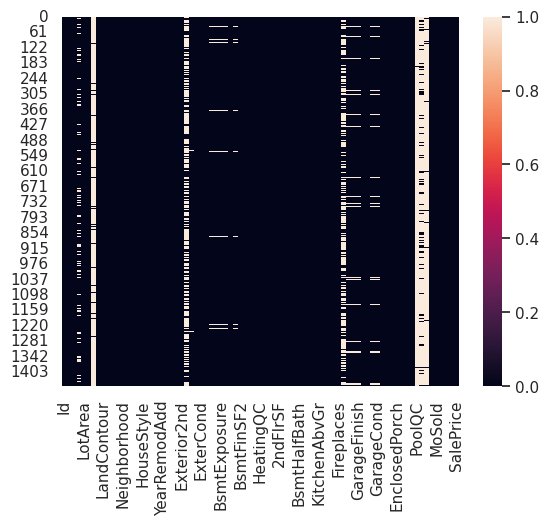

In [3]:
sns.heatmap(df.isna())

In [4]:
columns_with_nulls = df.columns[df.isnull().any()]

df_with_nulls = df[columns_with_nulls]

In [5]:
columns_with_nulls


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

                    WARNING  /tmp/ipykernel_35025/1455154588.py:6: FutureWarning:                   ]8;id=89068;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=131937;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/warnings.py#109\109]8;;\
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x=missing_percentage.values, y=missing_percentage.index,                
                             palette="Blues", orient="h", legend=False)                                            
                                                                                                                   

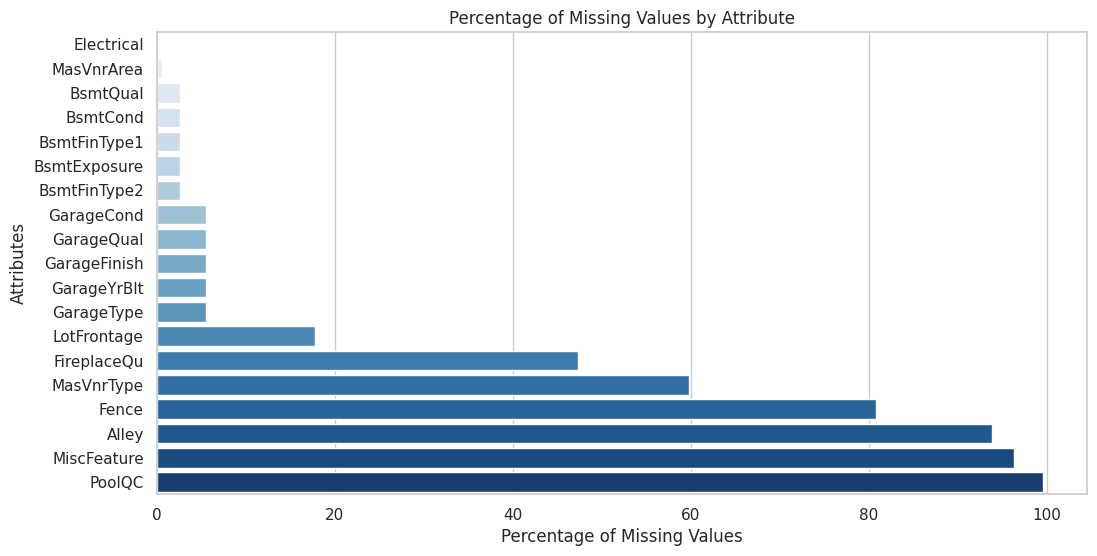

In [6]:
missing_percentage = (df_with_nulls.isnull().sum() / len(df)) * 100

missing_percentage = missing_percentage.sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette="Blues", orient="h", legend=False)

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Attributes')
plt.title('Percentage of Missing Values by Attribute')

plt.show()

## Descriptions of attributes with null values

**LotFrontage**
- **Description:** Linear feet of street connected to the property.
- **Data Type:** Numeric (Continuous)

**Alley**
- **Description:** Type of alley access to the property.
- **Data Type:** Categorical (Nominal)
- **Categories:** 'Grvl' (Gravel), 'Pave' (Paved), 'NA' (No alley access)

**MasVnrType**
- **Description:** Masonry veneer type.
- **Data Type:** Categorical (Nominal)
- **Categories:** 'BrkCmn' (Brick Common), 'BrkFace' (Brick Face), 'CBlock' (Cinder Block), 'None' (None), 'Stone' (Stone)

**MasVnrArea**
- **Description:** Masonry veneer area in square feet.
- **Data Type:** Numeric (Continuous)

**BsmtQual**
- **Description:** Evaluates the height of the basement.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'Ex' (Excellent), 'Gd' (Good), 'TA' (Typical), 'Fa' (Fair), 'Po' (Poor), 'NA' (No Basement)

**BsmtCond**
- **Description:** Evaluates the general condition of the basement.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'Ex' (Excellent), 'Gd' (Good), 'TA' (Typical), 'Fa' (Fair), 'Po' (Poor), 'NA' (No Basement)

**BsmtExposure**
- **Description:** Refers to walkout or garden level walls in the basement.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'Gd' (Good Exposure), 'Av' (Average Exposure), 'Mn' (Minimum Exposure), 'No' (No Exposure), 'NA' (No Basement)

**BsmtFinType1**
- **Description:** Rating of basement finished area.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'GLQ' (Good Living Quarters), 'ALQ' (Average Living Quarters), 'BLQ' (Below Average Living Quarters), 'Rec' (Average Rec Room), 'LwQ' (Low Quality), 'Unf' (Unfinished), 'NA' (No Basement)

**BsmtFinType2**
- **Description:** Rating of basement finished area (if multiple types).
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'GLQ' (Good Living Quarters), 'ALQ' (Average Living Quarters), 'BLQ' (Below Average Living Quarters), 'Rec' (Average Rec Room), 'LwQ' (Low Quality), 'Unf' (Unfinished), 'NA' (No Basement)

**Electrical**
- **Description:** Electrical system.
- **Data Type:** Categorical (Nominal)
- **Categories:** 'SBrkr' (Standard Circuit Breakers & Romex), 'FuseA' (Fuse Box over 60 AMP), 'FuseF' (60 AMP Fuse Box and mostly Romex wiring), 'FuseP' (60 AMP Fuse Box and mostly knob & tube wiring), 'Mix' (Mixed)

**FireplaceQu**
- **Description:** Fireplace quality.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'Ex' (Excellent), 'Gd' (Good), 'TA' (Typical), 'Fa' (Fair), 'Po' (Poor), 'NA' (No Fireplace)

**GarageType**
- **Description:** Garage location.
- **Data Type:** Categorical (Nominal)
- **Categories:** '2Types' (More than one type of garage), 'Attchd' (Attached to home), 'Basment' (Basement Garage), 'BuiltIn' (Built-In), 'CarPort' (Car Port), 'Detchd' (Detached from home), 'NA' (No Garage)

**GarageYrBlt**
- **Description:** Year the garage was built.
- **Data Type:** Numeric (Discrete)

**GarageFinish**
- **Description:** Interior finish of the garage.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'Fin' (Finished), 'RFn' (Rough Finished), 'Unf' (Unfinished), 'NA' (No Garage)

**GarageQual**
- **Description:** Garage quality.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'Ex' (Excellent), 'Gd' (Good), 'TA' (Typical), 'Fa' (Fair), 'Po' (Poor), 'NA' (No Garage)

**GarageCond**
- **Description:** Garage condition.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'Ex' (Excellent), 'Gd' (Good), 'TA' (Typical), 'Fa' (Fair), 'Po' (Poor), 'NA' (No Garage)

**PoolQC**
- **Description:** Pool quality.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'Ex' (Excellent), 'Gd' (Good), 'TA' (Typical), 'Fa' (Fair), 'NA' (No Pool)

**Fence**
- **Description:** Fence quality.
- **Data Type:** Categorical (Ordinal)
- **Categories:** 'GdPrv' (Good Privacy), 'MnPrv' (Minimum Privacy), 'GdWo' (Good Wood), 'MnWw' (Minimum Wood/Wire), 'NA' (No Fence)

**MiscFeature**
- **Description:** Miscellaneous feature not covered in other categories.
- **Data Type:** Categorical (Nominal)
- **Categories:** 'Elev' (Elevator), 'Gar2' (2nd Garage), 'Othr' (Other), 'Shed' (Shed), 'TenC' (Tennis Court), 'NA' (None)


Create a dictionary of column names with null values to track them when dealing with null values.

In [7]:
missing_dict = missing_percentage.to_dict()

In [8]:
print(missing_dict)

{'Electrical': 0.0684931506849315, 'MasVnrArea': 0.547945205479452, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'GarageYrBlt': 5.5479452054794525, 'GarageType': 5.5479452054794525, 'LotFrontage': 17.73972602739726, 'FireplaceQu': 47.26027397260274, 'MasVnrType': 59.726027397260275, 'Fence': 80.75342465753424, 'Alley': 93.76712328767123, 'MiscFeature': 96.30136986301369, 'PoolQC': 99.52054794520548}


## Removing null values
### PoolQC

Let's start by analysing the PoolQC attribute as it has the highest proportion of null values. The data dictionary shows that there are two attributes related to pools 
- PoolArea: Pool area in square feet
- PoolQC: Pool quality.

These attributes may be important in prediction of outlier price values since houses with private pools are traditionally considered as a luxury addition to the property.

In [9]:
print(data_dict.get("PoolQC"))

{'Description': 'Pool quality', 'Categories': {'Ex': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical', 'Fa': 'Fair', 'NA': 'No Pool'}}


In [10]:
df["PoolQC"].describe()


count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

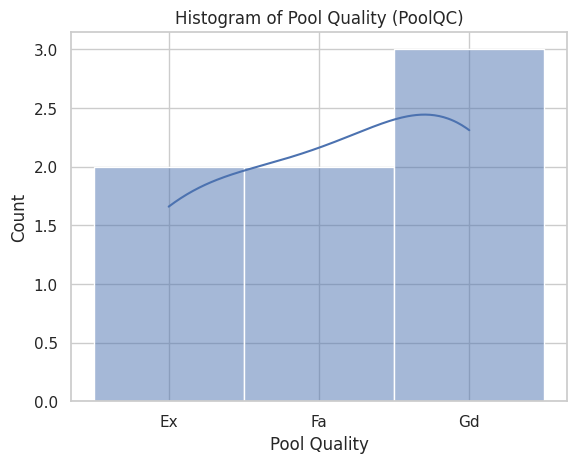

In [11]:
sns.histplot(data=df, x="PoolQC", kde=True)
plt.title("Histogram of Pool Quality (PoolQC)")
plt.xlabel("Pool Quality")
plt.ylabel("Count")
plt.show()

This attribute only has 7 non-null values. Let's manually check these rows. 

In [12]:
df[df["PoolQC"].isna() == False]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


Check whether there are other data points where pool areas are zero and pool quality is not null. 

In [13]:
filtered_data = df[(df['PoolArea'] == 0) & (~df['PoolQC'].isnull())]

# Check if there are any rows that meet the condition
if not filtered_data.empty:
    print("There are data points where PoolArea is not zero and PoolQC is not null.")
    print(filtered_data)
else:
    print("There are no data points where PoolArea is not zero and PoolQC is not null.")


There are no data points where PoolArea is not zero and PoolQC is not null.


In [14]:
df["PoolArea"].describe()


count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

The attribute description shows that attribute "PoolArea" has very few non-zero values due to low mean values and high standard deviation. Check how many non-zero values PoolArea attribute has.

In [15]:
non_zero_pool_area_count = (df['PoolArea'] != 0).sum()
print("Number of non-zero values in PoolArea:", non_zero_pool_area_count)

Number of non-zero values in PoolArea: 7


It's now clear that the missing values in the attribute PoolQC mean 'No Pool'. Therefore we replace all null values with 'NA' as pointed in the data dictionary.

In [16]:
df['PoolQC'].fillna('NA', inplace=True)

In [17]:
df['PoolQC'].isna().describe()


count      1460
unique        1
top       False
freq       1460
Name: PoolQC, dtype: object

Update the missing values dictionary

In [18]:
missing_dict.pop("PoolQC")
print(missing_dict)

{'Electrical': 0.0684931506849315, 'MasVnrArea': 0.547945205479452, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'GarageYrBlt': 5.5479452054794525, 'GarageType': 5.5479452054794525, 'LotFrontage': 17.73972602739726, 'FireplaceQu': 47.26027397260274, 'MasVnrType': 59.726027397260275, 'Fence': 80.75342465753424, 'Alley': 93.76712328767123, 'MiscFeature': 96.30136986301369}


### MiscFeature

In [19]:
data_dict.get('MiscFeature')


{
    'Description': 'Miscellaneous feature not covered in other categories',
    'Categories': {
        'Elev': 'Elevator',
        'Gar2': '2nd Garage (if not described in garage section)',
        'Othr': 'Other',
        'Shed': 'Shed (over 100 SF)',
        'TenC': 'Tennis Court',
        'NA': 'None'
    }
}

The data dictionary shows that similarly to the PoolQC, MiscFeature contains luxury items that are not usual for homes. 

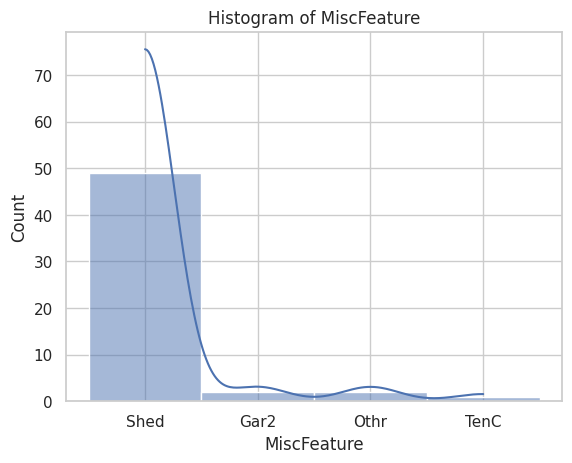

In [20]:
sns.histplot(data=df, x="MiscFeature", kde=True)
plt.title("Histogram of MiscFeature")
plt.xlabel("MiscFeature")
plt.ylabel("Count")
plt.show()

The histogram of MiscFeature values counts show that the dataset has only few points with non-null values.
Therefore, we replace the null values with 'NA'.

In [21]:
df['MiscFeature'].fillna('NA', inplace=True)

missing_dict.pop("MiscFeature")
print(missing_dict)

{'Electrical': 0.0684931506849315, 'MasVnrArea': 0.547945205479452, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'GarageYrBlt': 5.5479452054794525, 'GarageType': 5.5479452054794525, 'LotFrontage': 17.73972602739726, 'FireplaceQu': 47.26027397260274, 'MasVnrType': 59.726027397260275, 'Fence': 80.75342465753424, 'Alley': 93.76712328767123}


### Alley

In [22]:
data_dict.get("Alley")


{
    'Description': 'Type of alley access to property',
    'Categories': {'Grvl': 'Gravel', 'Pave': 'Paved', 'NA': 'No alley access'}
}

In [23]:
df["Alley"].value_counts()


Alley
Grvl    50
Pave    41
Name: count, dtype: int64

The attribute alley follows the similar pattern as the two attributes above. Again we replace the null values with 'NA'.

In [24]:
df['Alley'].fillna('NA', inplace=True)

missing_dict.pop("Alley")
print(missing_dict)

{'Electrical': 0.0684931506849315, 'MasVnrArea': 0.547945205479452, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'GarageYrBlt': 5.5479452054794525, 'GarageType': 5.5479452054794525, 'LotFrontage': 17.73972602739726, 'FireplaceQu': 47.26027397260274, 'MasVnrType': 59.726027397260275, 'Fence': 80.75342465753424}


It seems like the categorical values with null values in the dataset are simply missing the 'NA' values. Therefore, we follow the similar process without much comment until we face some anomaly.

### Fence

In [25]:
data_dict.get("Fence")


{
    'Description': 'Fence quality',
    'Categories': {
        'GdPrv': 'Good Privacy',
        'MnPrv': 'Minimum Privacy',
        'GdWo': 'Good Wood',
        'MnWw': 'Minimum Wood/Wire',
        'NA': 'No Fence'
    }
}

In [26]:
df["Fence"].value_counts()


Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [27]:
df['Fence'].fillna('NA', inplace=True)

missing_dict.pop("Fence")
print(missing_dict)

{'Electrical': 0.0684931506849315, 'MasVnrArea': 0.547945205479452, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'GarageYrBlt': 5.5479452054794525, 'GarageType': 5.5479452054794525, 'LotFrontage': 17.73972602739726, 'FireplaceQu': 47.26027397260274, 'MasVnrType': 59.726027397260275}


### MasVnrType

Since the above pattern seem to repeat for null values, we try to automate it further 

In [28]:
def check_null_values():
    print(data_dict.get(name))
    print()
    print("Before filling the null values: ")
    print()
    print(df[name].value_counts())


def fill_na_categ(placeholder):
    df[name].fillna(placeholder, inplace=True)
    
    print("After filling the null values:")
    print()
    print(df[name].value_counts())
    print()
    missing_dict.pop(name)
    print(missing_dict)

In [29]:
name = 'MasVnrType'
check_null_values()

{'Description': 'Masonry veneer type', 'Categories': {'BrkCmn': 'Brick Common', 'BrkFace': 'Brick Face', 'CBlock': 'Cinder Block', 'None': 'None', 'Stone': 'Stone'}}

Before filling the null values: 

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


In [30]:
fill_na_categ('None')

After filling the null values:

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'MasVnrArea': 0.547945205479452, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'GarageYrBlt': 5.5479452054794525, 'GarageType': 5.5479452054794525, 'LotFrontage': 17.73972602739726, 'FireplaceQu': 47.26027397260274}


### MasVnrArea

In [31]:
name = "MasVnrArea"
data_dict.get(name)

{'Description': 'Masonry veneer area in square feet'}

In [32]:
attributes_with_missing_values = ['MasVnrArea', 'MasVnrType']

# Create a new DataFrame with only the rows where at least one of the specified attributes has a missing value
subset_df = df[df[attributes_with_missing_values].isnull().any(axis=1)]

# Check if all rows with missing values for the specified attributes are the same
are_rows_same = subset_df.duplicated(subset=attributes_with_missing_values, keep=False)

print(are_rows_same.value_counts())

True    8
Name: count, dtype: int64


In [33]:
fill_na_categ(0)

After filling the null values:

MasVnrArea
0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'GarageYrBlt': 5.5479452054794525, 'GarageType': 5.5479452054794525, 'LotFrontage': 17.73972602739726, 'FireplaceQu': 47.26027397260274}


### FireplaceQu

In [34]:
name = "FireplaceQu"
check_null_values()

{'Description': 'Fireplace quality', 'Categories': {'Ex': 'Excellent - Exceptional Masonry Fireplace', 'Gd': 'Good - Masonry Fireplace in main level', 'TA': 'Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement', 'Fa': 'Fair - Prefabricated Fireplace in basement', 'Po': 'Poor - Ben Franklin Stove', 'NA': 'No Fireplace'}}

Before filling the null values: 

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64


In [35]:
fill_na_categ('NA')

After filling the null values:

FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'GarageYrBlt': 5.5479452054794525, 'GarageType': 5.5479452054794525, 'LotFrontage': 17.73972602739726}


### Garage Attributes

The missing value percentage values show that the dataset has several attributes related to 'garage' that have the same missing value proportions. Let's test if these missing values are all in the same rows

In [36]:
attributes_with_missing_values = ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType']

# Create a new DataFrame with only the rows where at least one of the specified attributes has a missing value
subset_df = df[df[attributes_with_missing_values].isnull().any(axis=1)]

# Check if all rows with missing values for the specified attributes are the same
are_rows_same = subset_df.duplicated(subset=attributes_with_missing_values, keep=False)

print(are_rows_same.value_counts())

True    81
Name: count, dtype: int64


The results show that all missing values of these attributes are in the same rows. In order words, there are no discrepancies within the null values of different attributes.

#### GarageYrBlt

In [37]:
data_dict.get('GarageYrBlt')

{'Description': 'Year garage was built'}

In [38]:
df['GarageYrBlt'].describe()


count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [39]:
df['GarageYrBlt'].isna().sum()

81

In [40]:
name = 'GarageYrBlt'
fill_na_categ(0)

After filling the null values:

GarageYrBlt
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 98, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'GarageType': 5.5479452054794525, 'LotFrontage': 17.73972602739726}


#### GarageType

In [41]:
name = "GarageType"
check_null_values()

{'Description': 'Garage location', 'Categories': {'2Types': 'More than one type of garage', 'Attchd': 'Attached to home', 'Basment': 'Basement Garage', 'BuiltIn': 'Built-In (Garage part of house - typically has room above garage)', 'CarPort': 'Car Port', 'Detchd': 'Detached from home', 'NA': 'No Garage'}}

Before filling the null values: 

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


In [42]:
fill_na_categ('NA')

After filling the null values:

GarageType
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'GarageFinish': 5.5479452054794525, 'LotFrontage': 17.73972602739726}


#### GarageFinish

In [43]:
name = "GarageFinish"
check_null_values()

{'Description': 'Interior finish of the garage', 'Categories': {'Fin': 'Finished', 'RFn': 'Rough Finished\t', 'Unf': 'Unfinished', 'NA': 'No Garage'}}

Before filling the null values: 

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64


In [44]:
fill_na_categ('NA')

After filling the null values:

GarageFinish
Unf    605
RFn    422
Fin    352
NA      81
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'GarageQual': 5.5479452054794525, 'LotFrontage': 17.73972602739726}


#### GarageQual

In [45]:
name = "GarageQual"
check_null_values()

{'Description': 'Garage quality', 'Categories': {'Ex': 'Excellent', 'Gd': 'Good', 'TA': 'Typical/Average', 'Fa': 'Fair', 'Po': 'Poor', 'NA': 'No Garage'}}

Before filling the null values: 

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64


In [46]:
fill_na_categ('NA')

After filling the null values:

GarageQual
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'GarageCond': 5.5479452054794525, 'LotFrontage': 17.73972602739726}


#### GarageCond

In [47]:
name = "GarageCond"
check_null_values()

{'Description': 'Garage condition', 'Categories': {'Ex': 'Excellent', 'Gd': 'Good', 'TA': 'Typical/Average', 'Fa': 'Fair', 'Po': 'Poor', 'NA': 'No Garage'}}

Before filling the null values: 

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


In [48]:
fill_na_categ('NA')

After filling the null values:

GarageCond
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType2': 2.6027397260273974, 'LotFrontage': 17.73972602739726}


### Basement attributes

Similarly to the 'Garage' attributes, let's do a fast check on 'Basement' attributes

In [49]:
attributes_with_missing_values = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']

# Create a new DataFrame with only the rows where at least one of the specified attributes has a missing value
subset_df = df[df[attributes_with_missing_values].isnull().any(axis=1)]

# Check if all rows with missing values for the specified attributes are the same
are_rows_same = subset_df.duplicated(subset=attributes_with_missing_values, keep=False)

print(are_rows_same.value_counts())

True     37
False     2
Name: count, dtype: int64


We have found some anomaly here

In [50]:
different_rows = subset_df[~are_rows_same]

different_rows[attributes_with_missing_values].head()

,BsmtQual,BsmtCond,BsmtFinType1,BsmtExposure,BsmtFinType2
332,Gd,TA,GLQ,No,NaN
948,Gd,TA,Unf,NaN,Unf


These row show some null values for attribute BsmtExposure and BsmtFinType2. Let's look at the data dictionary for these values.

For the row 332 the values of other attributes suggest that the BsmtFinType2 value should be 'GLQ', same as BsmtFinType1.

BsmtExposure should be 'No' in the row 948. 

In [51]:
df.loc[332, 'BsmtFinType2'] = 'GLQ'
df.loc[948, 'BsmtExposure'] = 'No'

#### BsmtFinType2 

In [52]:
name = 'BsmtFinType2'
check_null_values()

{'Description': 'Rating of basement finished area (if multiple types)', 'Categories': {'GLQ': 'Good Living Quarters', 'ALQ': 'Average Living Quarters', 'BLQ': 'Below Average Living Quarters\t', 'Rec': 'Average Rec Room', 'LwQ': 'Low Quality', 'Unf': 'Unfinshed', 'NA': 'No Basement'}}

Before filling the null values: 

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      15
Name: count, dtype: int64


In [53]:
fill_na_categ('NA')

After filling the null values:

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      15
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'LotFrontage': 17.73972602739726}


#### BsmtExposure

In [54]:
name = 'BsmtExposure'
check_null_values()

{'Description': 'Refers to walkout or garden level walls', 'Categories': {'Gd': 'Good Exposure', 'Av': 'Average Exposure (split levels or foyers typically score average or above)\t', 'Mn': 'Mimimum Exposure', 'No': 'No Exposure', 'NA': 'No Basement'}}

Before filling the null values: 

BsmtExposure
No    954
Av    221
Gd    134
Mn    114
Name: count, dtype: int64


In [55]:
fill_na_categ('NA')

After filling the null values:

BsmtExposure
No    954
Av    221
Gd    134
Mn    114
NA     37
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtFinType1': 2.5342465753424657, 'LotFrontage': 17.73972602739726}


#### BsmtFinType1

In [56]:
name = 'BsmtFinType1'
check_null_values()

{'Description': 'Rating of basement finished area', 'Categories': {'GLQ': 'Good Living Quarters', 'ALQ': 'Average Living Quarters', 'BLQ': 'Below Average Living Quarters\t', 'Rec': 'Average Rec Room', 'LwQ': 'Low Quality', 'Unf': 'Unfinshed', 'NA': 'No Basement'}}

Before filling the null values: 

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64


In [57]:
fill_na_categ('NA')

After filling the null values:

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'LotFrontage': 17.73972602739726}


#### BsmtCond

In [58]:
name = 'BsmtCond'
check_null_values()

{'Description': 'Evaluates the general condition of the basement', 'Categories': {'Ex': 'Excellent', 'Gd': 'Good', 'TA': 'Typical - slight dampness allowed', 'Fa': 'Fair - dampness or some cracking or settling', 'Po': 'Poor - Severe cracking, settling, or wetness', 'NA': 'No Basement'}}

Before filling the null values: 

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64


In [59]:
fill_na_categ('NA')

After filling the null values:

BsmtCond
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'BsmtQual': 2.5342465753424657, 'LotFrontage': 17.73972602739726}


#### BsmtQual

In [60]:
name = 'BsmtQual'
check_null_values()

{'Description': 'Evaluates the height of the basement', 'Categories': {'Ex': 'Excellent (100+ inches)\t', 'Gd': 'Good (90-99 inches)', 'TA': 'Typical (80-89 inches)', 'Fa': 'Fair (70-79 inches)', 'Po': 'Poor (<70 inches', 'NA': 'No Basement'}}

Before filling the null values: 

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64


In [61]:
fill_na_categ('NA')

After filling the null values:

BsmtQual
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: count, dtype: int64

{'Electrical': 0.0684931506849315, 'LotFrontage': 17.73972602739726}


### Electrical

In [62]:
name = 'Electrical'
check_null_values()

{'Description': 'Electrical system', 'Categories': {'SBrkr': 'Standard Circuit Breakers & Romex', 'FuseA': 'Fuse Box over 60 AMP and all Romex wiring (Average)\t', 'FuseF': '60 AMP Fuse Box and mostly Romex wiring (Fair)', 'FuseP': '60 AMP Fuse Box and mostly knob & tube wiring (poor)', 'Mix': 'Mixed'}}

Before filling the null values: 

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64


In [63]:
missing_dict

{'Electrical': 0.0684931506849315, 'LotFrontage': 17.73972602739726}

In [64]:
df['Electrical'].isna().sum()

1

In [65]:
fill_na_categ('SBrkr')

After filling the null values:

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

{'LotFrontage': 17.73972602739726}


### LotFrontage

In [66]:
name = "LotFrontage"
data_dict.get(name)

{'Description': 'Linear feet of street connected to property'}

In [67]:
df[name].describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [68]:
fill_na_categ(0)

After filling the null values:

LotFrontage
0.0      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: count, Length: 111, dtype: int64

{}


In [69]:
# Select attributes with 'object' data type
object_columns = df.select_dtypes(include='object').columns

# Create a list of numeric attributes
other_attr = [col for col in df.columns if col not in object_columns]

object_columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [70]:
other_attr


[
    'Id',
    'MSSubClass',
    'LotFrontage',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold',
    'SalePrice'
]

# Encoding categorical values

## Ordinal attributes

Let's start by selecting attributes that describe condition or quality of an entity. 

In [71]:
ordinal_attr = ['PoolQC', 'GarageQual', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'GarageCond', 'ExterCond', 'BsmtQual', 'ExterQual']

# Remove ordinal attributes from the columns with object dtype
object_columns = [attr for attr in object_columns if attr not in ordinal_attr]

Now, we need to encode them one by one by looking at their value definitions in the data dictionary

In [72]:
def get_ordinal_values(name):
    print("Attribute: " + name)
    print(data_dict.get(name))
    
    # Ket reversed keys
    categ = list(reversed(data_dict[name]['Categories'].keys()))
    print("Reversed list of keys from the data dictionary: ")
    print(categ)
    print()

In [73]:
for name in ordinal_attr:
    get_ordinal_values(name)

Attribute: PoolQC
{'Description': 'Pool quality', 'Categories': {'Ex': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical', 'Fa': 'Fair', 'NA': 'No Pool'}}
Reversed list of keys from the data dictionary: 
['NA', 'Fa', 'TA', 'Gd', 'Ex']

Attribute: GarageQual
{'Description': 'Garage quality', 'Categories': {'Ex': 'Excellent', 'Gd': 'Good', 'TA': 'Typical/Average', 'Fa': 'Fair', 'Po': 'Poor', 'NA': 'No Garage'}}
Reversed list of keys from the data dictionary: 
['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

Attribute: FireplaceQu
{'Description': 'Fireplace quality', 'Categories': {'Ex': 'Excellent - Exceptional Masonry Fireplace', 'Gd': 'Good - Masonry Fireplace in main level', 'TA': 'Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement', 'Fa': 'Fair - Prefabricated Fireplace in basement', 'Po': 'Poor - Ben Franklin Stove', 'NA': 'No Fireplace'}}
Reversed list of keys from the data dictionary: 
['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

Attribute: KitchenQual
{'Descript

It looks like all ordinal values may have the same values. Therefore, we can encode them ordinally using the same rule

In [74]:
def encode(name, mapping):
    print("Attribute name: " + name)

    categ = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

    present_categ = list(df[name].unique())
    print("Unordered values in the attribute")
    print(present_categ)

    categ = [val for val in categ if val in present_categ]
    print("Ordered values that are present in the attribute: ")
    print(categ)

    # Before encoding
    print(df[name].value_counts())

    df[name] = df[name].map(mapping)
    
    # After encoding
    print(df[name].value_counts())

Now we encode all ordinal categories and manually check their correctness

In [75]:
mapping = {
            'NA': 0,
            'Po': 1,
            'Fa': 2,
            'TA': 3,
            'Gd': 4,
            'Ex': 5
        }

for name in ordinal_attr:
    encode(name, mapping)

Attribute name: PoolQC
Unordered values in the attribute
['NA', 'Ex', 'Fa', 'Gd']
Ordered values that are present in the attribute: 
['NA', 'Fa', 'Gd', 'Ex']
PoolQC
NA    1453
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64
PoolQC
0    1453
4       3
5       2
2       2
Name: count, dtype: int64
Attribute name: GarageQual
Unordered values in the attribute
['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po']
Ordered values that are present in the attribute: 
['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageQual
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
GarageQual
3    1311
0      81
2      48
4      14
5       3
1       3
Name: count, dtype: int64
Attribute name: FireplaceQu
Unordered values in the attribute
['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po']
Ordered values that are present in the attribute: 
['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
FireplaceQu
0    690


In [76]:
df[ordinal_attr].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PoolQC       1460 non-null   int64
 1   GarageQual   1460 non-null   int64
 2   FireplaceQu  1460 non-null   int64
 3   KitchenQual  1460 non-null   int64
 4   HeatingQC    1460 non-null   int64
 5   BsmtCond     1460 non-null   int64
 6   GarageCond   1460 non-null   int64
 7   ExterCond    1460 non-null   int64
 8   BsmtQual     1460 non-null   int64
 9   ExterQual    1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


Let's manually look through the rest of the columns with object dtype

In [77]:
for name in object_columns:
    print(name)
    print(data_dict[name]['Description'])
    print(data_dict[name]['Categories'].keys())
    print()

MSZoning
Identifies the general zoning classification of the sale.
dict_keys(['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'])

Street
Type of road access to property
dict_keys(['Grvl', 'Pave'])

Alley
Type of alley access to property
dict_keys(['Grvl', 'Pave', 'NA'])

LotShape
General shape of property
dict_keys(['Reg', 'IR1', 'IR2', 'IR3'])

LandContour
Flatness of the property
dict_keys(['Lvl', 'Bnk', 'HLS', 'Low'])

Utilities
Type of utilities available
dict_keys(['AllPub', 'NoSewr', 'NoSeWa', 'ELO'])

LotConfig
Lot configuration
dict_keys(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'])

LandSlope
Slope of property
dict_keys(['Gtl', 'Mod', 'Sev'])

Neighborhood
Physical locations within Ames city limits
dict_keys(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'])

Conditio

It looks like some values here need custom mapping

## Custom mapping
#### CentralAir

In [78]:
name = 'CentralAir'

print(data_dict.get(name))
mapping = {'N' : 0, 'Y': 1}
encode(name, mapping)

object_columns.remove(name)

{'Description': 'Central air conditioning', 'Categories': {'N': 'No', 'Y': 'Yes'}}
Attribute name: CentralAir
Unordered values in the attribute
['Y', 'N']
Ordered values that are present in the attribute: 
[]
CentralAir
Y    1365
N      95
Name: count, dtype: int64
CentralAir
1    1365
0      95
Name: count, dtype: int64


In [79]:
binary_attr = [name]

#### PavedDrive

In [80]:
name = 'PavedDrive'

print(data_dict.get(name))

mapping = {'N' : 0, 'P':1, 'Y': 2}
encode(name, mapping)

object_columns.remove(name)

{'Description': 'Paved driveway', 'Categories': {'Y': 'Paved ', 'P': 'Partial Pavement', 'N': 'Dirt/Gravel'}}
Attribute name: PavedDrive
Unordered values in the attribute
['Y', 'N', 'P']
Ordered values that are present in the attribute: 
[]
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64
PavedDrive
2    1340
0      90
1      30
Name: count, dtype: int64


In [81]:
# We need to add more ordinal features identified during the custom mapping process.
ordinal_attr.append(name)

#### Fence

In [82]:
name = 'Fence'

print(data_dict.get(name))

{'Description': 'Fence quality', 'Categories': {'GdPrv': 'Good Privacy', 'MnPrv': 'Minimum Privacy', 'GdWo': 'Good Wood', 'MnWw': 'Minimum Wood/Wire', 'NA': 'No Fence'}}


In [83]:
mapping = {'NA' : 0, 'MnWw':1, 'GdWo': 2, 'MnPrv':3, 'GdPrv':4}
encode(name, mapping)

object_columns.remove(name)

Attribute name: Fence
Unordered values in the attribute
['NA', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']
Ordered values that are present in the attribute: 
['NA']
Fence
NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64
Fence
0    1179
3     157
4      59
2      54
1      11
Name: count, dtype: int64


In [84]:
ordinal_attr.append(name)

#### Alley

In [85]:
name = 'Alley'

print(data_dict.get(name))

{'Description': 'Type of alley access to property', 'Categories': {'Grvl': 'Gravel', 'Pave': 'Paved', 'NA': 'No alley access'}}


In [86]:
mapping = {'NA' : 0, 'Grvl':1, 'Pave': 2}
encode(name, mapping)

object_columns.remove(name)

Attribute name: Alley
Unordered values in the attribute
['NA', 'Grvl', 'Pave']
Ordered values that are present in the attribute: 
['NA']
Alley
NA      1369
Grvl      50
Pave      41
Name: count, dtype: int64
Alley
0    1369
1      50
2      41
Name: count, dtype: int64


In [87]:
ordinal_attr.append(name)

#### Street

In [88]:
name = 'Street'

print(data_dict.get(name))

{'Description': 'Type of road access to property', 'Categories': {'Grvl': 'Gravel\t', 'Pave': 'Paved'}}


In [89]:
mapping = {'Grvl':1, 'Pave': 2}
encode(name, mapping)

object_columns.remove(name)

Attribute name: Street
Unordered values in the attribute
['Pave', 'Grvl']
Ordered values that are present in the attribute: 
[]
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Street
2    1454
1       6
Name: count, dtype: int64


In [90]:
ordinal_attr.append(name)

#### LandSlope

In [91]:
name = 'LandSlope'

print(data_dict.get(name))

{'Description': 'Slope of property', 'Categories': {'Gtl': 'Gentle slope', 'Mod': 'Moderate Slope\t', 'Sev': 'Severe Slope'}}


In [92]:
mapping = {'Sev':1, 'Mod': 2, 'Gtl': 3}
encode(name, mapping)

object_columns.remove(name)

Attribute name: LandSlope
Unordered values in the attribute
['Gtl', 'Mod', 'Sev']
Ordered values that are present in the attribute: 
[]
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
LandSlope
3    1382
2      65
1      13
Name: count, dtype: int64


In [93]:
ordinal_attr.append(name)

#### Utilities

In [94]:
name = 'Utilities'

print(data_dict.get(name))

{'Description': 'Type of utilities available', 'Categories': {'AllPub': 'All public Utilities (E,G,W,& S)\t', 'NoSewr': 'Electricity, Gas, and Water (Septic Tank)', 'NoSeWa': 'Electricity and Gas Only', 'ELO': 'Electricity only\t'}}


In [95]:
mapping = {'ELO':1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}
encode(name, mapping)

object_columns.remove(name)

Attribute name: Utilities
Unordered values in the attribute
['AllPub', 'NoSeWa']
Ordered values that are present in the attribute: 
[]
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
Utilities
4    1459
2       1
Name: count, dtype: int64


In [96]:
ordinal_attr.append(name)

#### BsmtExposure

In [97]:
name = 'BsmtExposure'

print(data_dict.get(name))

{'Description': 'Refers to walkout or garden level walls', 'Categories': {'Gd': 'Good Exposure', 'Av': 'Average Exposure (split levels or foyers typically score average or above)\t', 'Mn': 'Mimimum Exposure', 'No': 'No Exposure', 'NA': 'No Basement'}}


In [98]:
mapping = {'NA':0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
encode(name, mapping)

object_columns.remove(name)

Attribute name: BsmtExposure
Unordered values in the attribute
['No', 'Gd', 'Mn', 'Av', 'NA']
Ordered values that are present in the attribute: 
['NA', 'Gd']
BsmtExposure
No    954
Av    221
Gd    134
Mn    114
NA     37
Name: count, dtype: int64
BsmtExposure
1    954
3    221
4    134
2    114
0     37
Name: count, dtype: int64


In [99]:
ordinal_attr.append(name)

#### Functional

In [100]:
name = 'Functional'

print(data_dict.get(name))

{'Description': 'Home functionality (Assume typical unless deductions are warranted)', 'Categories': {'Typ': 'Typical Functionality', 'Min1': 'Minor Deductions 1', 'Min2': 'Minor Deductions 2', 'Mod': 'Moderate Deductions', 'Maj1': 'Major Deductions 1', 'Maj2': 'Major Deductions 2', 'Sev': 'Severely Damaged', 'Sal': 'Salvage only'}}


In [101]:
mapping = {
    'Typ': 7,
    'Min1': 6,
    'Min2': 5,
    'Mod': 4,
    'Maj1': 3,
    'Maj2': 2,
    'Sev': 1,
    'Sal': 0
}

encode(name, mapping)

object_columns.remove(name)

Attribute name: Functional
Unordered values in the attribute
['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev']
Ordered values that are present in the attribute: 
[]
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64
Functional
7    1360
5      34
6      31
4      15
3      14
2       5
1       1
Name: count, dtype: int64


In [102]:
ordinal_attr.append(name)

#### GarageFinish

In [103]:
name = 'GarageFinish'
print(data_dict.get(name))

{'Description': 'Interior finish of the garage', 'Categories': {'Fin': 'Finished', 'RFn': 'Rough Finished\t', 'Unf': 'Unfinished', 'NA': 'No Garage'}}


In [104]:
mapping = {
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'NA': 0
}

encode(name, mapping)

object_columns.remove(name)

Attribute name: GarageFinish
Unordered values in the attribute
['RFn', 'Unf', 'Fin', 'NA']
Ordered values that are present in the attribute: 
['NA']
GarageFinish
Unf    605
RFn    422
Fin    352
NA      81
Name: count, dtype: int64
GarageFinish
1    605
2    422
3    352
0     81
Name: count, dtype: int64


In [105]:
ordinal_attr.append(name)

In [106]:
for name in object_columns:
    print(name)
    print(data_dict[name]['Description'])
    print(data_dict[name]['Categories'].keys())
    print()

MSZoning
Identifies the general zoning classification of the sale.
dict_keys(['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'])

LotShape
General shape of property
dict_keys(['Reg', 'IR1', 'IR2', 'IR3'])

LandContour
Flatness of the property
dict_keys(['Lvl', 'Bnk', 'HLS', 'Low'])

LotConfig
Lot configuration
dict_keys(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'])

Neighborhood
Physical locations within Ames city limits
dict_keys(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'])

Condition1
Proximity to various conditions
dict_keys(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])

Condition2
Proximity to various conditions (if more than one is present)
dict_keys(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])

BldgType

## Nominal Attributes
The rest of the attributes looks like nominal attributes. When encoding them, we can face a model interpreting these values as ordinal.

To prevent models from misinterpreting binary-encoded values as ordinal, you can:

- Use models that are specifically designed to handle categorical data: Algorithms like decision trees, random forests, and gradient boosting machines can work well with binary-encoded categorical features and do not impose ordinal assumptions.

- Use proper encoding methods: If you're concerned about ordinal misinterpretation, consider using one-hot encoding or dummy encoding instead of binary encoding. These methods create separate binary columns for each category, explicitly indicating the presence or absence of each category, which eliminates any potential ordinal assumptions.

- Feature selection and evaluation: When working with binary encoding, carefully evaluate the performance of your model to ensure that it's not making erroneous assumptions about the ordinal nature of the data. You can use techniques like feature importance analysis to understand how the binary-encoded features are affecting the model's predictions.

For now, let's use the Label Encoder for now to avoid high dimensionality

In [107]:
#pip install category-encoders

In [108]:
from sklearn.preprocessing import LabelEncoder

# Put the rest of the attributes
nominal_attr = object_columns

for attr in nominal_attr:

    label_encoder = LabelEncoder()

    df[attr] = label_encoder.fit_transform(df[attr])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Attribute category dictionary
After encoding all categorical features as integer values, it is important to keep track of the categories during feature engineering. Therefore, we create a dictionary of categories and feature names in each category.

In [110]:
ordinal_attr


[
    'PoolQC',
    'GarageQual',
    'FireplaceQu',
    'KitchenQual',
    'HeatingQC',
    'BsmtCond',
    'GarageCond',
    'ExterCond',
    'BsmtQual',
    'ExterQual',
    'PavedDrive',
    'Fence',
    'Alley',
    'Street',
    'LandSlope',
    'Utilities',
    'BsmtExposure',
    'Functional',
    'GarageFinish'
]

In [111]:
binary_attr

['CentralAir']

In [112]:
other_attr


[
    'Id',
    'MSSubClass',
    'LotFrontage',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold',
    'SalePrice'
]

In [113]:
id_attr = ['Id']
other_attr.remove('Id')

Now let's manually read through the data dictionary and categorise the attributes

In [114]:
add_attr = ['OverallQual', 'OverallCond']
for attr in add_attr:     
    ordinal_attr.append(attr)
    other_attr.remove(attr)

In [115]:
nominal_attr.append('MSSubClass')
other_attr.remove('MSSubClass')

In [116]:
target = ['SalePrice']
other_attr.remove('SalePrice')

In [117]:
datetime_attr = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

for attr in datetime_attr:     
    other_attr.remove(attr)

In [118]:
for name in other_attr:    
    print("Attribute: " + name)
    print(data_dict.get(name))
    print()

Attribute: LotFrontage
{'Description': 'Linear feet of street connected to property'}

Attribute: LotArea
{'Description': 'Lot size in square feet'}

Attribute: MasVnrArea
{'Description': 'Masonry veneer area in square feet'}

Attribute: BsmtFinSF1
{'Description': 'Type 1 finished square feet'}

Attribute: BsmtFinSF2
{'Description': 'Type 2 finished square feet'}

Attribute: BsmtUnfSF
{'Description': 'Unfinished square feet of basement area'}

Attribute: TotalBsmtSF
{'Description': 'Total square feet of basement area'}

Attribute: 1stFlrSF
{'Description': 'First Floor square feet'}

Attribute: 2ndFlrSF
{'Description': 'Second floor square feet'}

Attribute: LowQualFinSF
{'Description': 'Low quality finished square feet (all floors)'}

Attribute: GrLivArea
{'Description': 'Above grade (ground) living area square feet'}

Attribute: BsmtFullBath
{'Description': 'Basement full bathrooms'}

Attribute: BsmtHalfBath
{'Description': 'Basement half bathrooms'}

Attribute: FullBath
{'Description

The rest are numeric attributes

In [119]:
numeric_attr = other_attr

In [120]:
nominal_attr


[
    'MSZoning',
    'LotShape',
    'LandContour',
    'LotConfig',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Foundation',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'Electrical',
    'GarageType',
    'MiscFeature',
    'SaleType',
    'SaleCondition',
    'MSSubClass'
]

Let's check if we missed any attribute or not

In [121]:
all_attr = ordinal_attr + binary_attr + numeric_attr + nominal_attr + datetime_attr + target + id_attr

In [122]:
len(all_attr)

81

In [123]:
set(all_attr) == set(df.columns) 

True

In [124]:
categ_dict = {
    'Ordinal' : ordinal_attr,
    'Binary' : binary_attr,
    'Numeric' : numeric_attr,
    'Nominal' : nominal_attr,
    'Datetime' : datetime_attr,
    'Target' : target,
    'Id' : id_attr
}

In [126]:
catalog.save("feature_category_dictionary", categ_dict)

[10/21/23 21:45:59] INFO     Saving data to 'feature_category_dictionary' (JSONDataset)...      ]8;id=14138;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=932598;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py#531\531]8;;\

In [127]:
catalog.save("clean_data", df)

[10/21/23 21:46:03] INFO     Saving data to 'clean_data' (CSVDataset)...                        ]8;id=778147;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=71013;file:///home/gunee/anaconda3/envs/ai-hack-melbourne-2023/lib/python3.10/site-packages/kedro/io/data_catalog.py#531\531]8;;\